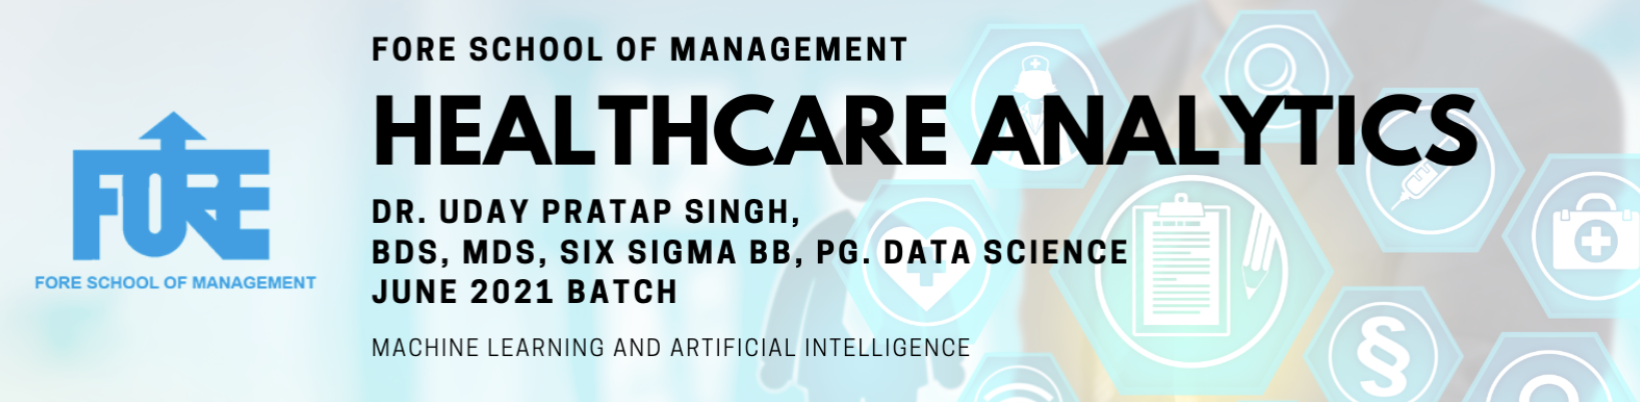

Version 1 | Updated July 31, 2021 | Dr. Uday Pratap Singh

## Basic Image exploration in Python

In [1]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage import exposure
import sys
import skimage.viewer

In [2]:
# creating a function to show images
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    faig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

## Reading an image in Python

In [3]:
#reading a sample image
image = skimage.io.imread(fname="person1_bacteria_1.jpeg")

## Image is nothing but a mathematical array

In [4]:
# skimage.io.imread reads an image as an array
image

array([[[ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69],
        ...,
        [118, 118, 118],
        [117, 117, 117],
        [118, 118, 118]],

       [[ 68,  68,  68],
        [ 69,  69,  69],
        [ 69,  69,  69],
        ...,
        [121, 121, 121],
        [121, 121, 121],
        [121, 121, 121]],

       [[ 68,  68,  68],
        [ 68,  68,  68],
        [ 69,  69,  69],
        ...,
        [119, 119, 119],
        [118, 118, 118],
        [118, 118, 118]],

       ...,

       [[  7,   7,   7],
        [  7,   7,   7],
        [  5,   5,   5],
        ...,
        [ 10,  10,  10],
        [ 11,  11,  11],
        [ 11,  11,  11]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [  5,   5,   5],
        ...,
        [ 10,  10,  10],
        [ 11,  11,  11],
        [ 11,  11,  11]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [  5,   5,   5],
        ...,
        [ 10,  10,  10],
        [ 11,  11,  11],
        [ 11,  11,  11]]

## Viewing the images using the skimage.viewer - a very good tool for radiologists

In [5]:
# displaying the image that was read as an image
# this viewer is a very good tool to look at the pixel density at various points and
# understanding the coordinate system of the radiographs
viewer = skimage.viewer.ImageViewer(image)
viewer.show()

/Users/udaypratapsingh/opt/anaconda3/lib/python3.7/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


[]

## Converting the 3 layered (RGB) image into a single (gray) layer

In [59]:
# converting that 3 layered (RGB) image into a single layered image
image_gray = color.rgb2gray(image)

In [11]:
# this image is a single layered array
image_gray

array([[0.27058824, 0.27058824, 0.27058824, ..., 0.4627451 , 0.45882353,
        0.4627451 ],
       [0.26666667, 0.27058824, 0.27058824, ..., 0.4745098 , 0.4745098 ,
        0.4745098 ],
       [0.26666667, 0.26666667, 0.27058824, ..., 0.46666667, 0.4627451 ,
        0.4627451 ],
       ...,
       [0.02745098, 0.02745098, 0.01960784, ..., 0.03921569, 0.04313725,
        0.04313725],
       [0.02745098, 0.02745098, 0.01960784, ..., 0.03921569, 0.04313725,
        0.04313725],
       [0.02745098, 0.02745098, 0.01960784, ..., 0.03921569, 0.04313725,
        0.04313725]])

## Histogram of the image - for evaluating possible thresholding and segmentation

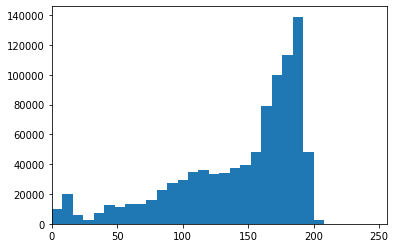

In [13]:
#looking at a histogram of the image that we have read
fig, ax = plt.subplots(1, 1)
ax.hist(image.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

## Viewing the radiograph inline

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

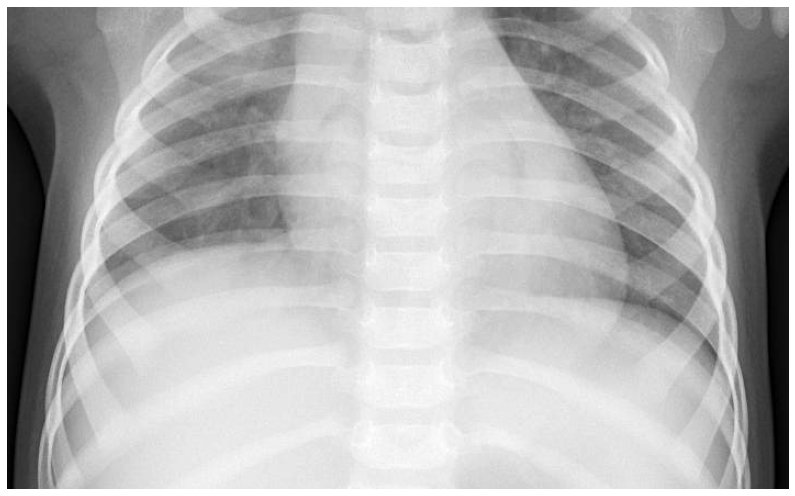

In [122]:
# viewing the image inline for convenience
image_show(image_gray)

## Some standard segmentation algorithms in skimage

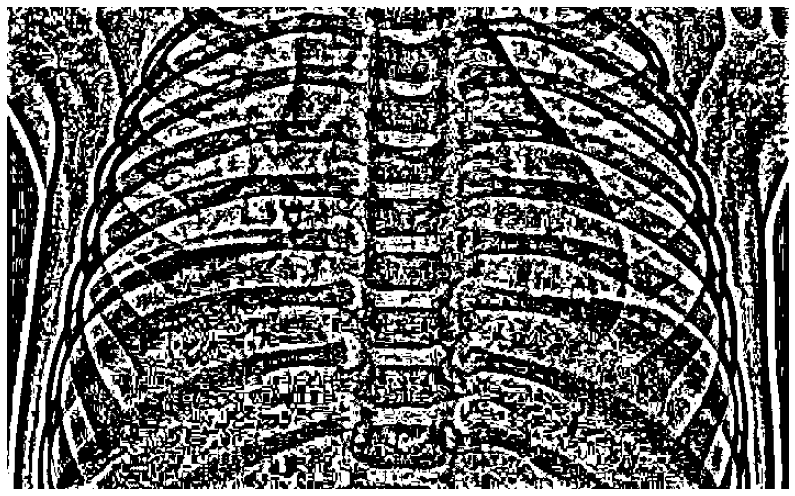

In [20]:
# basic segmmentation manipulation to view image in different ways
image_threshold = filters.threshold_niblack(image_gray)  # Hit tab with the cursor after the underscore to get all the methods.
image_show(image_gray < image_threshold);

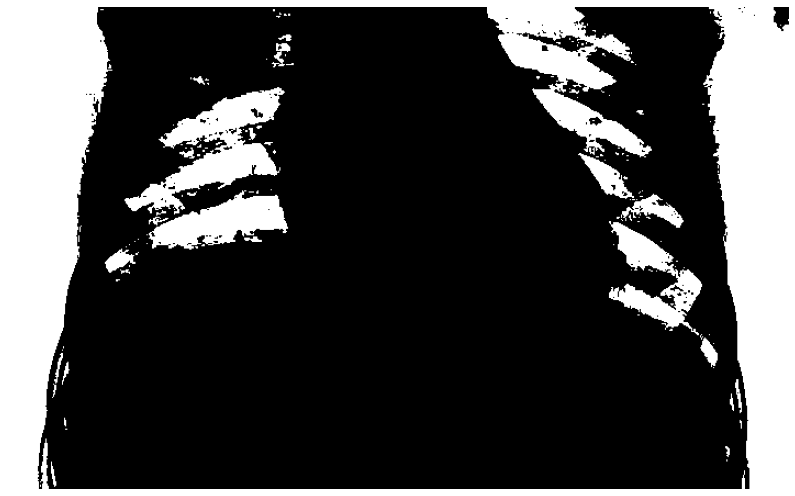

In [124]:
# basic segmmentation manipulation to view image in different ways
image_threshold = filters.threshold_li(image_gray)  # Hit tab with the cursor after the underscore to get all the methods.
image_show(image_gray < image_threshold);

## Attempting a supervised segmentation of the heart with very poor results

In [23]:
# creating a circular region where the machine should focus
def circle_points(resolution, center, radius):
    """
    Generate points which define a circle on an image.Centre refers to the centre of the circle
    """   
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T
# Exclude last point because a closed path should not have duplicate points
points = circle_points(200, [150, 300], 50)[:-1]

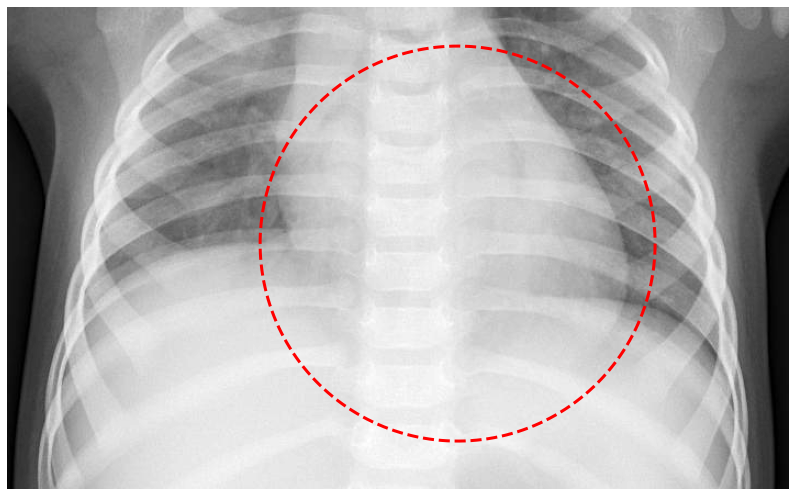

In [38]:
# drawing the circle on the image as a layer
points = circle_points(210, [215, 410], 180)[:-1]
fig, ax = image_show(image_gray)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

/Users/udaypratapsingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  """Entry point for launching an IPython kernel.


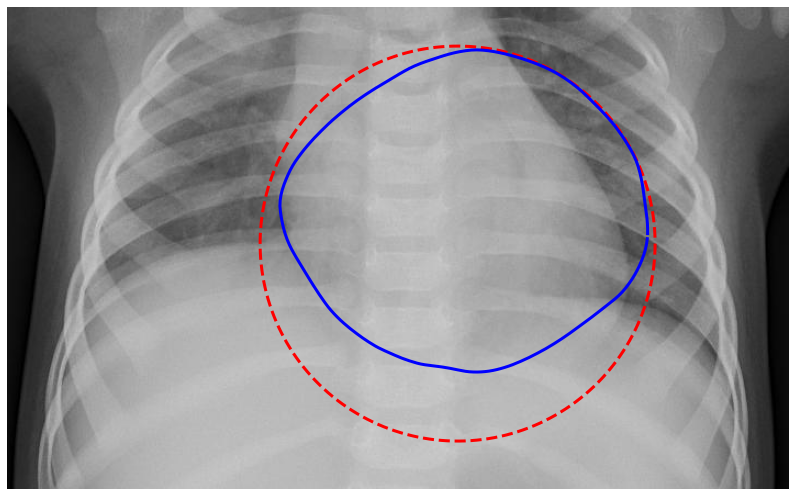

In [47]:
# attempting contouring 
snake = seg.active_contour(image_gray, points, alpha = 0.02)#, w_line=-4)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

### Thanks to: https://datacarpentry.org/image-processing/07-thresholding/index.html
### Thanks to: http://scipy-lectures.org/advanced/image_processing/
### Thanks to: https://youtu.be/d1CIV9irQAY

# Model building

## Disclaimer:
### Thanks to: https://youtu.be/nHQDDAAzIsI
### At this time I am only replicating their work so that I would be able to better understand the various techniques, theory and code that has been used in the video. This is not original work and is an attempt to learning.

## Initiating the Model

In [90]:
# importing keras
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [92]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape=(224,224,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics =['accuracy'])

## Model summary

In [93]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)       

## Training dataset

In [94]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = False)

test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [97]:
from keras_preprocessing.image import ImageDataGenerator

In [119]:
train_generator = train_datagen.flow_from_directory(
    "train",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')



Found 5840 images belonging to 2 classes.


In [115]:
train_generator.class_indices

{'normal': 0, 'pneumonia': 1}

In [125]:
# Not attempting a test dataset as of now
# validation_generator = test_dataset.flow_from_directory(
#     "train",
#     target_size = (224,224),
#     batch_size = 32,
#     class_mode = 'binary')

## Model creation

In [120]:
hist = model.fit_generator(
train_generator,
steps_per_epoch = 8, 
epochs = 10)
# validation_data = validation_generator, 
# validation_steps = 2)

Epoch 1/10
8/8 [==============================] - 28s 4s/step - loss: 0.6485 - accuracy: 0.6367
Epoch 2/10
8/8 [==============================] - 30s 4s/step - loss: 0.5740 - accuracy: 0.7734
Epoch 3/10
8/8 [==============================] - 32s 4s/step - loss: 0.6438 - accuracy: 0.6758
Epoch 4/10
8/8 [==============================] - 31s 4s/step - loss: 0.5950 - accuracy: 0.7333
Epoch 5/10
8/8 [==============================] - 35s 4s/step - loss: 0.5518 - accuracy: 0.7734
Epoch 6/10
8/8 [==============================] - 37s 5s/step - loss: 0.6245 - accuracy: 0.7383
Epoch 7/10
8/8 [==============================] - 36s 5s/step - loss: 0.6351 - accuracy: 0.6719
Epoch 8/10
8/8 [==============================] - 36s 4s/step - loss: 0.5778 - accuracy: 0.7344
Epoch 9/10
8/8 [==============================] - 37s 5s/step - loss: 0.5384 - accuracy: 0.7734
Epoch 10/10
8/8 [==============================] - 36s 5s/step - loss: 0.6029 - accuracy: 0.6914


## The End